### Import libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier



### Load dataset

In [21]:
df = pd.read_csv('./TEH1.csv')
df

,TEH,MQ3,MQ4,MQ5,MQ135
0,OOLONG,563,959,2279,945
1,OOLONG,558,964,2350,951
2,OOLONG,557,998,2281,949
3,OOLONG,558,963,2293,947
4,OOLONG,555,962,2303,947
...,...,...,...,...,...
783,HIJAU,568,703,1683,681
784,HIJAU,588,712,1687,666
785,HIJAU,594,712,1691,681
786,HIJAU,584,714,1703,691


### Data Assesment

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEH     788 non-null    object
 1    MQ3    788 non-null    int64 
 2    MQ4    788 non-null    int64 
 3    MQ5    788 non-null    int64 
 4    MQ135  788 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 30.9+ KB


In [23]:
df.describe()

,MQ3,MQ4,MQ5,MQ135
count,788.000000,788.000000,788.000000,788.000000
mean,643.322335,850.388325,1928.604061,787.398477
std,103.153862,74.251514,276.494875,114.956955
min,520.000000,667.000000,1653.000000,457.000000
25%,556.000000,779.000000,1710.000000,694.000000
50%,587.000000,873.500000,1733.500000,746.500000
75%,774.000000,902.000000,2275.000000,881.000000
max,853.000000,998.000000,2382.000000,1100.000000


In [24]:
df.isnull().sum()

TEH       0
 MQ3      0
 MQ4      0
 MQ5      0
 MQ135    0
dtype: int64

In [27]:
df.columns

Index(['TEH', ' MQ3', ' MQ4', ' MQ5', ' MQ135'], dtype='object')

### EDA

c:\Users\andid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


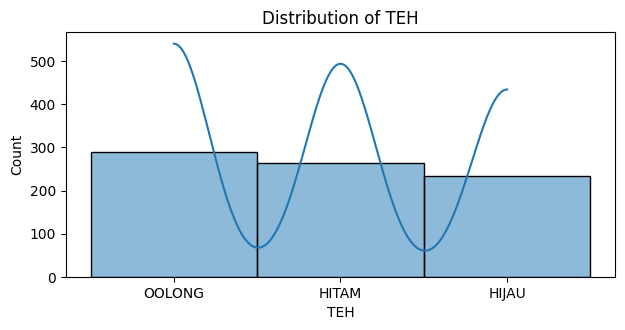

c:\Users\andid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\andid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\andid\App

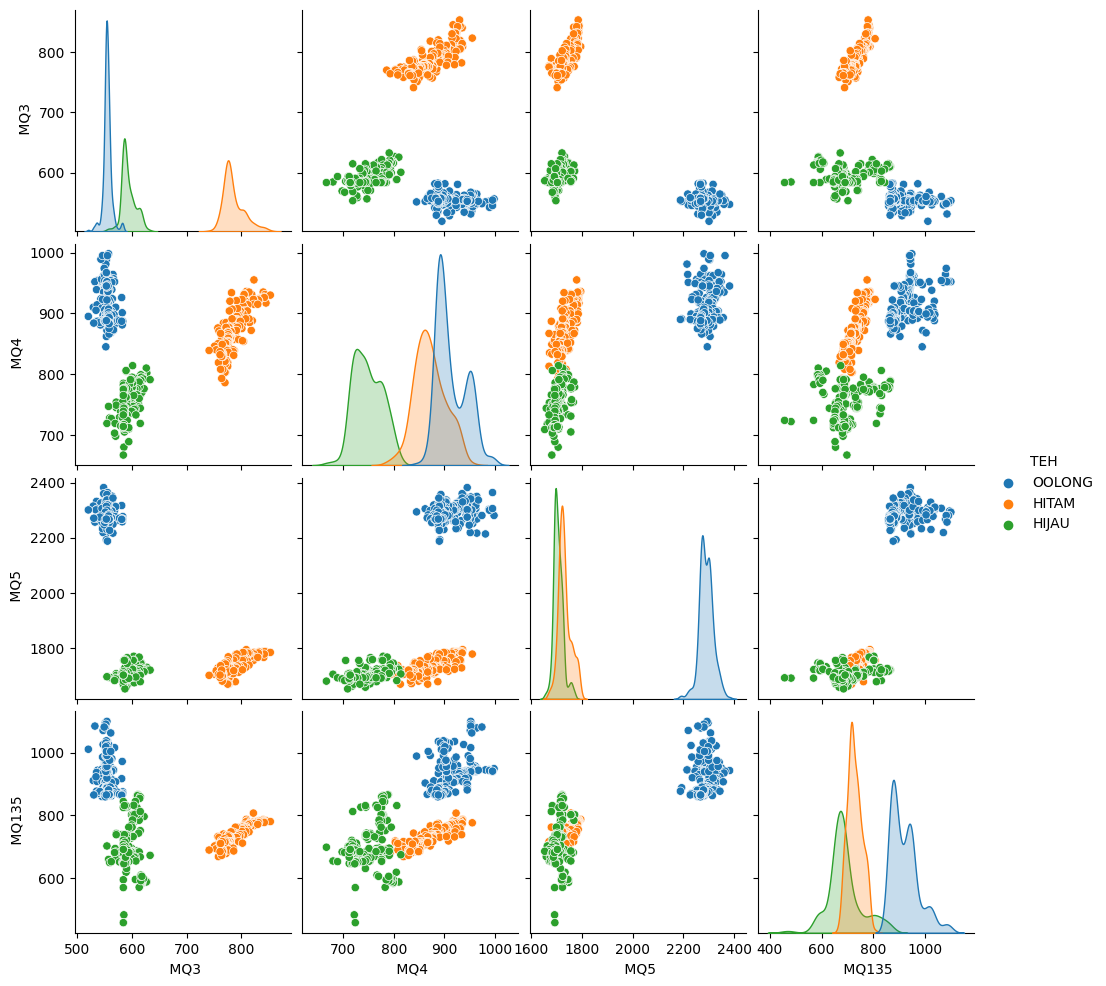

In [31]:
# Distribution of gas sensor readings
plt.figure(figsize=(12, 6))
for i, sensor in enumerate(df.columns[:1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[sensor], bins=30, kde=True)
    plt.title(f'Distribution of {sensor}')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue='TEH', diag_kind='kde')
plt.show()

In [32]:
le = LabelEncoder()
df['TEH'] = le.fit_transform(df['TEH'])
df

,TEH,MQ3,MQ4,MQ5,MQ135
0,2,563,959,2279,945
1,2,558,964,2350,951
2,2,557,998,2281,949
3,2,558,963,2293,947
4,2,555,962,2303,947
...,...,...,...,...,...
783,0,568,703,1683,681
784,0,588,712,1687,666
785,0,594,712,1691,681
786,0,584,714,1703,691


### Data Modelling

In [33]:
X = df.drop('TEH', axis=1)
y = df['TEH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predictions

y_pred = clf.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        49

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Confusion Matrix:
[[45  0  0]
 [ 0 64  0]
 [ 0  0 49]]
Accuracy Score:
1.0


### Comparative Analysis

In [38]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Training set performance:")
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("Accuracy Score:", accuracy_score(y_train, y_train_pred))

    print("\nTesting set performance:")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("-" * 60)

In [39]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, X_train, y_train, X_test, y_test)

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
evaluate_model(svm, X_train, y_train, X_test, y_test)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test)

# Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
evaluate_model(gbc, X_train, y_train, X_test, y_test)


Model: LogisticRegression
Training set performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       241

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630

Confusion Matrix:
 [[188   0   0]
 [  0 201   0]
 [  0   0 241]]
Accuracy Score: 1.0

Testing set performance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        49

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Confusion Matrix:
 [[45  0 

In [40]:
def check_overfitting(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{model.__class__.__name__} Training Accuracy: {train_accuracy}")
    print(f"{model.__class__.__name__} Testing Accuracy: {test_accuracy}")
    print(f"Difference (Overfitting Check): {train_accuracy - test_accuracy}\n")

for model in [log_reg, svm, knn, gbc, clf]:
    model.fit(X_train, y_train)
    check_overfitting(model, X_train, y_train, X_test, y_test)


LogisticRegression Training Accuracy: 1.0
LogisticRegression Testing Accuracy: 1.0
Difference (Overfitting Check): 0.0

SVC Training Accuracy: 1.0
SVC Testing Accuracy: 1.0
Difference (Overfitting Check): 0.0

KNeighborsClassifier Training Accuracy: 1.0
KNeighborsClassifier Testing Accuracy: 1.0
Difference (Overfitting Check): 0.0

GradientBoostingClassifier Training Accuracy: 1.0
GradientBoostingClassifier Testing Accuracy: 1.0
Difference (Overfitting Check): 0.0

RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Testing Accuracy: 1.0
Difference (Overfitting Check): 0.0

